# Bank Marketing

#### Abstract: 

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


#### Data Set Information: 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Attribute Information:

#### Bank client data:

* Age (numeric)

* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:

* Contact: contact communication type (categorical: 'cellular','telephone')

* Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:

* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* Previous: number of contacts performed before this campaign and for this client (numeric)

* Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes

* Emp.var.rate: employment variation rate - quarterly indicator (numeric)

* Cons.price.idx: consumer price index - monthly indicator (numeric)

* Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

* Euribor3m: euribor 3 month rate - daily indicator (numeric)

* Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

* y - has the client subscribed a term deposit? (binary: 'yes', 'no')



#### Analysis Steps:
* Atribute information Analysis.

* Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Naive Bayes)

* Deep Learning (ANN)

#### Source:

* Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
#
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#
from sklearn.pipeline import Pipeline
#
from sklearn.utils import resample

#### Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

D:\Users\Plaban_Nayak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Loading the DataSample

In [2]:
df_bank = pd.read_csv('bank-additional-full.csv',delim_whitespace=False,sep=';')
#display first five rows in the DataFrame
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Drop Column Duration as suggested

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [3]:
df_bank = df_bank.drop(['duration'],axis=1)
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### View the structure of the dataset

In [4]:
# shape
print("Shape:")
print(df_bank.shape)
print()
print("Dataset info:")
print()
print(df_bank.info())

Shape:
(41188, 20)

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 

#### Check for null values if any

In [5]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Hence determined that the dataset provided has no null  values

#### Check how well the label y is distributed


In [6]:
df_bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

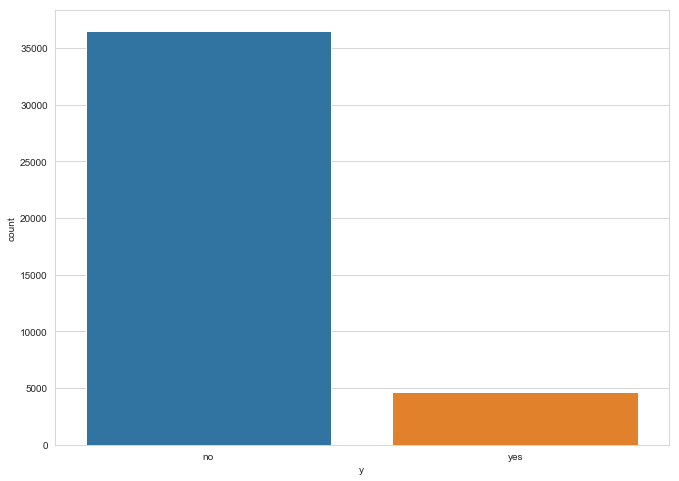

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.countplot('y',data=df_bank)

In [8]:
np.round((df_bank[df_bank['y'] == 'yes']['y'].count() / df_bank.shape[0] *100),2)

11.27

In [9]:
print('Total Percentage of client subscribed to term deposit {} % of the entire client base'.format(np.round((df_bank[df_bank['y'] == 'yes']['y'].count() / df_bank.shape[0] *100),2)))

Total Percentage of client subscribed to term deposit 11.27 % of the entire client base


#### Plotting some categorical variables

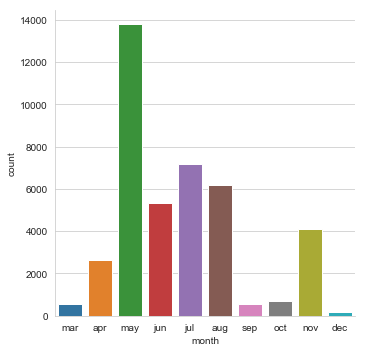

In [10]:
# show feature month - last contact month of year and count it
sns.catplot(x='month',kind='count',data=df_bank, order=["mar", "apr", "may", "jun", "jul", "aug", "sep","oct", "nov",
                   "dec"])

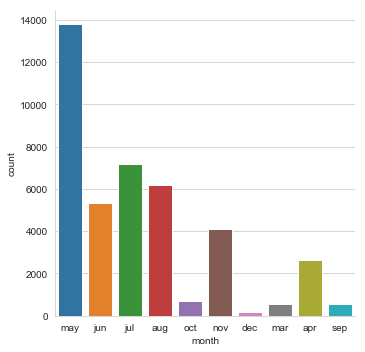

In [11]:
sns.catplot(x='month',kind='count',data=df_bank)

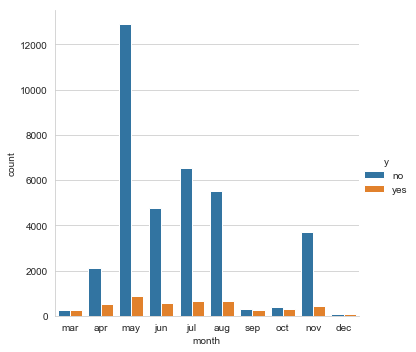

In [12]:
# count subscribed deposit per month
sns.catplot(x='month',kind='count',hue='y',data=df_bank, order=["mar", "apr", "may", "jun", "jul", "aug", "sep","oct", "nov",
                   "dec"])

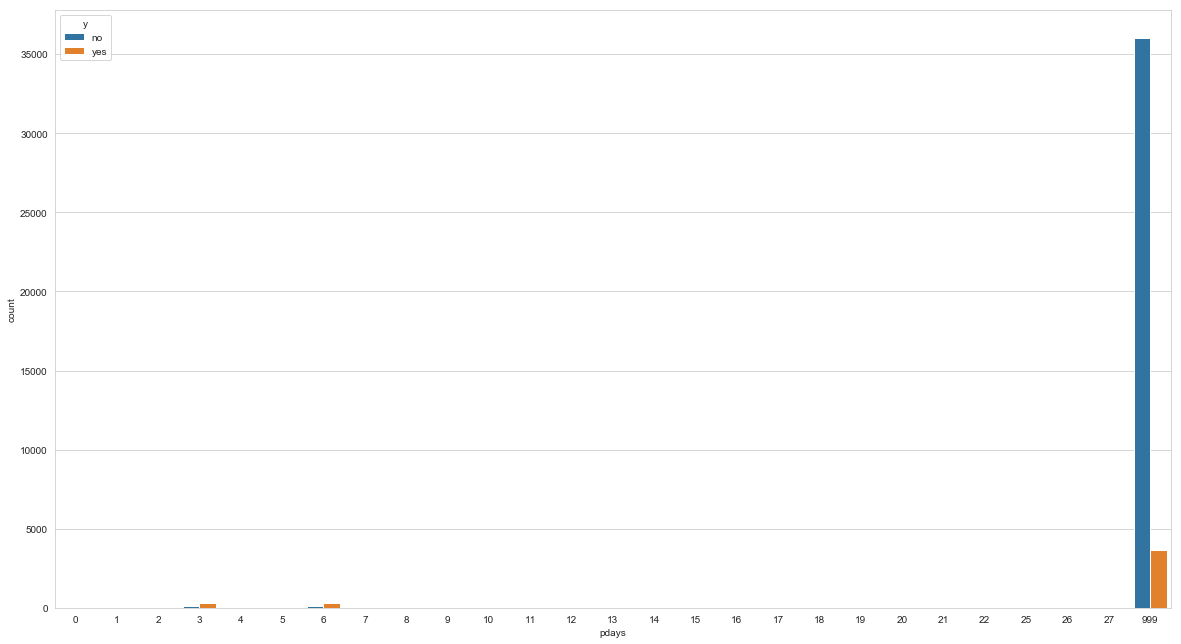

In [13]:
# pdays: number of days that passed by after the client was 
# last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# count y
plt.figure(figsize=(20,11))
sns.countplot(x="pdays", hue="y", data=df_bank)

It seems to me that the variable "month" and "day_of_week" have no relevance for the prediction. For some reason, many calls were made in May. Most calls were made for the first time (999).

In [14]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Prepare Data

In [15]:
#### Prepare Data
new_df = df_bank.copy()

In [16]:
# remove columns month and day_of_week
new_df= df_bank.drop(["month", "day_of_week"],axis=1)
#
new_df.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(9)
memory usage: 5.7+ MB


In [ ]:
new_df[]

#### Encode the Categorical Values

In [32]:
cat_cols = [ x for x in new_df.columns if new_df[x].dtypes =='object']

In [33]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [34]:
cat_cols = cat_cols[:len(cat_cols)-1]

In [35]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [37]:
for cols in cat_cols:
    new_df = pd.get_dummies(new_df,columns=[cols],prefix=[cols])

In [38]:
new_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,1,0,0,0,1,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,1,0,0,0,1,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,1,1,0,0,0,1,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,1,0,0,0,1,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,0,1,0,1,0,1,0


In [39]:
# use scikit-learn LabelEncoder to encode labels
lb = LabelEncoder()
new_df['y_class'] = lb.fit_transform(new_df['y'])

In [40]:
new_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y_class
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,1,0,0,0,1,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,1,0,0,0,1,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,1,0,0,0,1,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,1,0,0,0,1,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,1,0,1,0,0


In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null object
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employe

In [48]:
new_df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'y_class'],
      dtype='object')

In [50]:
new_df = new_df.drop('y',axis=1)

In [51]:
new_df.y_class.value_counts()

0    36548
1     4640
Name: y_class, dtype: int64

#### Resample Dataset -Upsample Minority  Class

In [58]:
#Resample
dataset_majority = new_df[new_df['y_class'] ==0]
dataset_minority = new_df[new_df['y_class'] ==1]

#Downsample

df_majority_downsampled = resample(dataset_majority,replace=False,n_samples=len(dataset_minority),random_state=1)

#
df_downsampled = pd.concat([df_majority_downsampled,dataset_minority])

#
df_downsampled.y_class.value_counts()

1    4640
0    4640
Name: y_class, dtype: int64

#### Now the dataset is balanced

In [57]:
df_downsampled.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y_class
20507,35,2,999,0,1.4,93.444,-36.1,4.966,5228.1,0,...,0,1,0,0,1,0,0,1,0,0
33693,35,1,999,1,-1.8,92.893,-46.2,1.281,5099.1,0,...,1,1,0,0,1,0,1,0,0,0
641,29,3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,1,1,0,0,0,1,0,1,0,0
10478,37,16,999,0,1.4,94.465,-41.8,4.961,5228.1,1,...,0,1,0,0,0,1,0,1,0,0
1582,44,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,1,0,1,0,1,0,0


#### Resample Dataset - Upsample Minority Class

In [59]:
#Upsample

df_minority_upsampled = resample(dataset_minority,replace=True,n_samples=len(dataset_majority),random_state=1)

#
df_upsampled = pd.concat([df_minority_upsampled,dataset_majority])

#
df_upsampled.y_class.value_counts()

1    36548
0    36548
Name: y_class, dtype: int64

#### Before Upsampling Dataset 

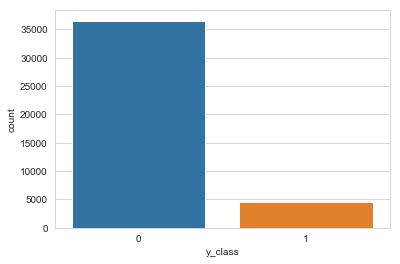

In [62]:
sns.countplot('y_class',data=new_df)

#### After Upsampling dataset

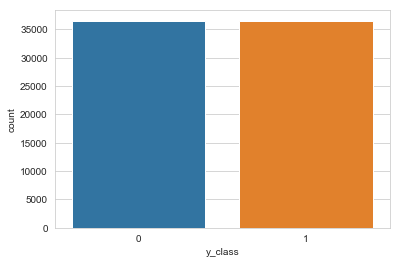

In [63]:
sns.countplot('y_class',data=df_upsampled)

#### Now the dataset is balanced after upsampling 

##### Spliting the upsampled dataset into training set and test set

In [65]:
#### Segregate the predictor variables and target variable
X = df_upsampled.drop('y_class',axis=1)
Y = df_upsampled['y_class']

In [66]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

print('training data set shape : ',X_train.shape)
print('test data set shape : ',X_test.shape)

training data set shape :  (58476, 47)
test data set shape :  (14620, 47)


#### Evaluate Algorithms

In [68]:
# Spot Check some Classification  Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))

# Test options and evaluation metric
num_folds = 10
seed = 1
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg)

LR - results(mean) : 0.734284 -results(std): 0.003593
KNN - results(mean) : 0.860216 -results(std): 0.006748
DT - results(mean) : 0.937359 -results(std): 0.003265
NB - results(mean) : 0.710291 -results(std): 0.005753


#### Compare Algorithms

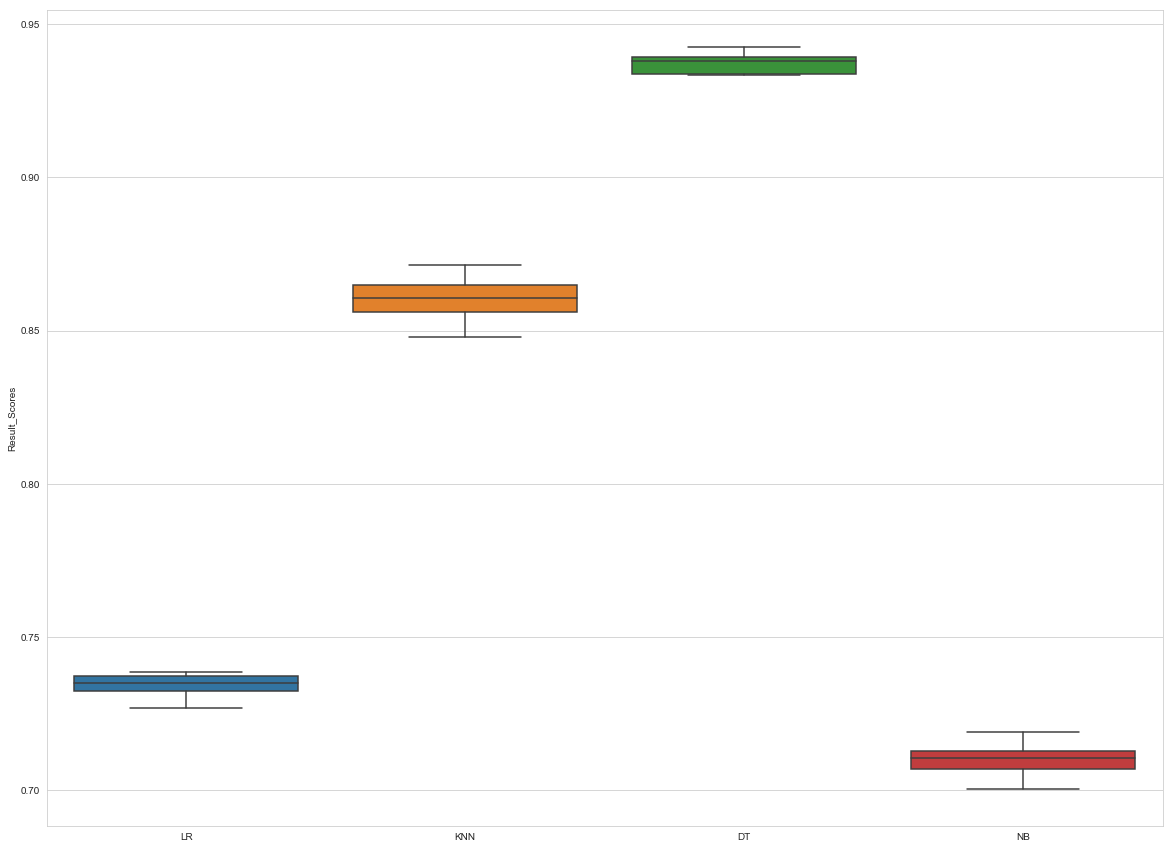

In [79]:
plt.figure(figsize=(20,15))
sns.boxplot(x=names, y=results)
plt.ylabel('Result_Scores')
plt.show()

DecisionTreeClassifier has better result compared to other algorithms

#### Comparing ensemble algorithms

#### What is an ensemble method?

The idea here is to train multiple models, each with the objective to predict or classify a set of results.

Most of the errors from a model’s learning are from three main factors: 
    * variance, 
    
    * noise, and 
    
    * bias. 

By using ensemble methods, we are able to increase the stability of the final model and reduce the errors mentioned previously. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source.

The main principle behind ensemble modelling is to group weak learners together to form one strong learner.

From many, together they emerge as one.

#### There are three main terms describing the ensemble (combination) of various models into one more effective model:

* Bagging to decrease the model’s variance;

* Boosting to decreasing the model’s bias, and;

* Stacking to increasing the predictive force of the classifier.

In [80]:
# Compare Algorithms

pipelines = []
pipelines.append(("AB",
                  Pipeline([("AB", AdaBoostClassifier())])))
pipelines.append(("GBM",
                  Pipeline([("GBM", GradientBoostingClassifier())])))
pipelines.append(("RF",
                  Pipeline([("RF", RandomForestClassifier())])))
pipelines.append(("ET",
                  Pipeline([("ET", ExtraTreesClassifier())])))

results = []
names = []

#
for name,model in pipelines:
    kfold = KFold(n_splits = num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg)

AB - results(mean) : 0.744015 -results(std): 0.003611
GBM - results(mean) : 0.754481 -results(std): 0.004400
RF - results(mean) : 0.959368 -results(std): 0.002886
ET - results(mean) : 0.964909 -results(std): 0.002377


#### Compare algorithms

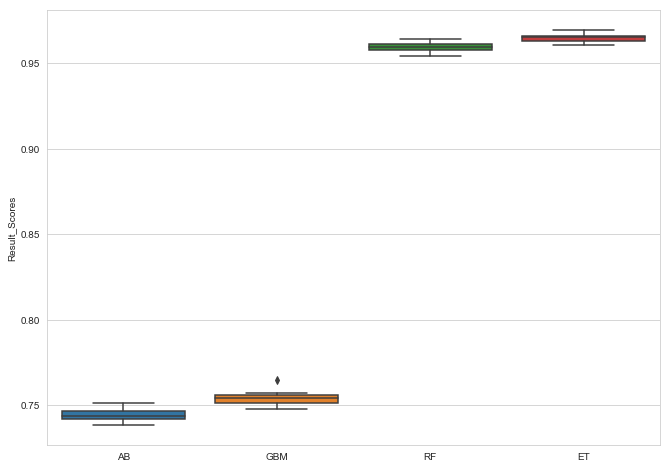

In [82]:
plt.figure(figsize=(11,8))
sns.boxplot(x=names, y=results)
plt.ylabel('Result_Scores')
plt.show()

#### ExtratreeClassifier gives a better score

# FINALIZE THE MODEL

# ExtraTreesClassifier - ExtraTrees is named for (Extremely Randomized Trees)

ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.

#### Let’s look at some ensemble methods ordered from high to low variance, ending in ExtraTreesClassifier.


#### Decision Tree (High Variance)

A single decision tree is usually overfits the data it is learning from because it learn from only one pathway of decisions. Predictions from a single decision tree usually don’t make accurate predictions on new data.

#### Random Forest (Medium Variance)

Random forest models reduce the risk of overfitting by introducing randomness by:

* building multiple trees (n_estimators)

* drawing observations with replacement (i.e., a bootstrapped sample)

* splitting nodes on the best split among a random subset of the features selected at every node

#### Extra Trees (Low Variance)

Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. So, in summary, ExtraTrees:

* builds multiple trees with bootstrap = False by default, which means it samples without replacement

* nodes are split based on random splits among a random subset of the features selected at every node

In [86]:
# Finalize Model
model = ExtraTreesClassifier()
# prepare the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, predictions))
print("Classification report")
print(classification_report(y_test, predictions))

Accuracy score: 0.96922024623803
Classification report
             precision    recall  f1-score   support

          0       1.00      0.94      0.97      7235
          1       0.94      1.00      0.97      7385

avg / total       0.97      0.97      0.97     14620



# CONFUSION MATRIX

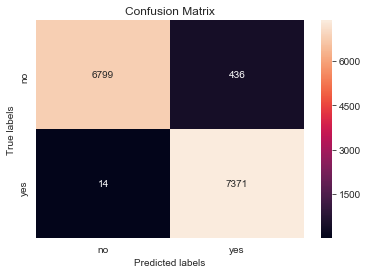

In [88]:
conf_mat = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, ax=ax, fmt='d')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no', 'yes'])
ax.yaxis.set_ticklabels(['no', 'yes'])
plt.show()

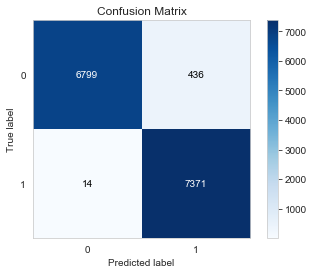

In [87]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, predictions)

#### Feature Importance with ExtraTreesClassifier

In [89]:
print(model.feature_importances_)

[1.55278786e-01 1.00742846e-01 3.24613956e-02 6.23618747e-03
 3.32176970e-02 2.37744988e-02 3.89181022e-02 2.18494146e-01
 4.02821887e-02 1.41433451e-02 1.35610170e-02 6.46621802e-03
 4.64151443e-03 8.22221596e-03 7.49141552e-03 6.47440592e-03
 8.62371940e-03 4.51401526e-03 1.17330897e-02 5.24350914e-03
 2.28163824e-03 1.00734345e-02 1.47171946e-02 1.27121084e-02
 9.28257252e-04 8.53395327e-03 8.00748789e-03 1.11141374e-02
 1.54337607e-02 3.91850067e-04 1.03862172e-02 1.42548092e-02
 6.58972757e-03 1.05577807e-02 1.05646960e-02 5.63363107e-06
 1.98850365e-02 2.26364022e-03 1.95465889e-02 1.25136142e-02
 2.10222748e-03 1.25694775e-02 1.49610431e-02 9.89979514e-03
 6.82856090e-03 1.65335358e-02 5.82348123e-03]


In [92]:
df_features = pd.DataFrame({'Features':X.columns,'Importance':np.round(model.feature_importances_,2)})

In [94]:
df_features.head()

,Features,Importance
0,age,0.16
1,campaign,0.10
2,pdays,0.03
3,previous,0.01
4,emp.var.rate,0.03


In [108]:
df_features = df_features.sort_values('Importance',ascending=False)

In [109]:
df_features.head()

,Features,Importance
7,euribor3m,0.22
0,age,0.16
1,campaign,0.10
6,cons.conf.idx,0.04
8,nr.employed,0.04


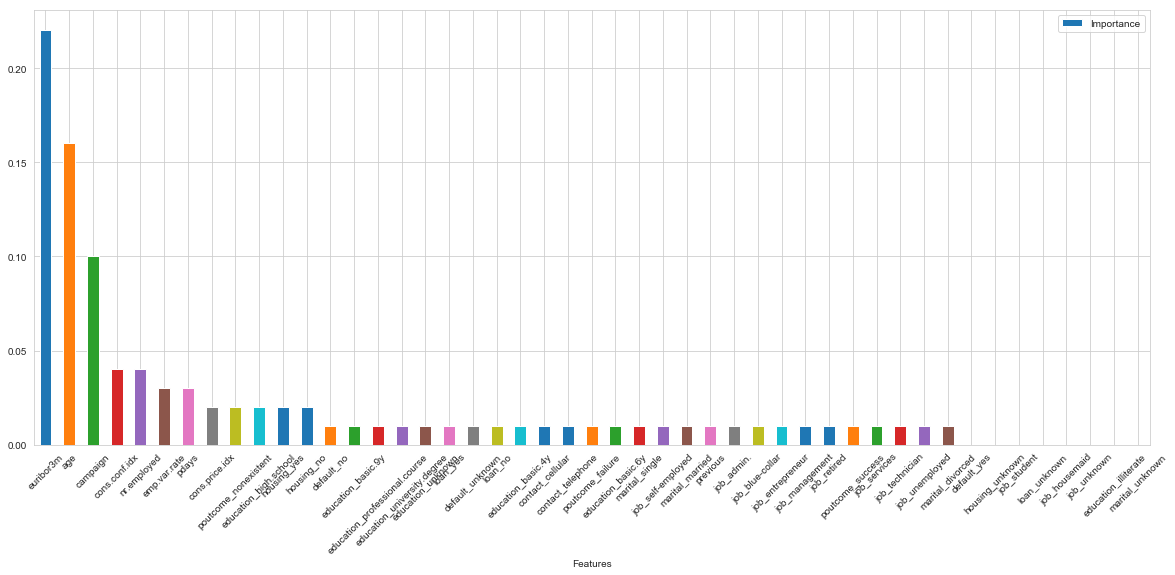

In [110]:
df_features.plot.bar(x='Features', y='Importance', rot=45,figsize=(20,8))